In [18]:
# Steven Granaturov
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib as mpl
from matplotlib.backends import backend_agg
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import normalize
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import tensorflow_probability as tfp
from keras import models
from keras import layers
print ('Using TensorFlow version',tf.__version__)

Using TensorFlow version 2.10.0


### Import the dataset and split among X and Y. Mostly obtained from assignment 2.

In [19]:
data = pd.read_csv('iris.csv', header = None)
data2 = data

X = data.iloc[:,0:4].values
y = data.iloc[:,4].values

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Getting features
iris_features = data.iloc[:,:4]

# Getting species 
iris_classes = data.iloc[:,4]

# The 6 possible combinations of 2 features
features = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]
feature_titles = ["AB","AC","AD","BC","BD","CD"]

### Obtain results from the Support Vector Machine with a linear kernal and display results. Also obtained from assignment 2.

In [20]:
def SVM(selected_features, kernel): # SVM (data not scaled)
    svm = SVC(kernel = kernel)
    svm.fit(selected_features, iris_classes)
    
    return svm.score(selected_features, iris_classes)

# Accuracy results for every 2 feature combination for SVM where kernel is linear
Linear_SVM_Scores = []

for i in range (6):
    selected_features = iris_features[features[i]]
    
    # logistic regression scores 
    Linear_SVM_Scores.append(SVM(selected_features, "linear"))

# Results
print("SVM with a Linear Kernal (Nonscaled) results:")
for i in range (6):
    print("Features", feature_titles[i], "results:", Linear_SVM_Scores[i])

SVM with a Linear Kernal (Nonscaled) results:
Features AB results: 0.82
Features AC results: 0.9533333333333334
Features AD results: 0.96
Features BC results: 0.96
Features BD results: 0.96
Features CD results: 0.9666666666666667


### Defining a neural network model. I have choosen to start with 20 neural nets, followed by 12, followed by 3. This seems to be a good model with high accuracies. There is no need to add more neural nets / more depth as the dataset is fairly small... limited to 150 data samples. The last layer is 3 neural nets because we have 3 iris classes. I am also using crossentropy as the loss function.

In [21]:
# Creating Train, Test, and validation data

# 80% train data     120 samples
# 20% test data      30 samples

model = models.Sequential()
model.add(layers.Dense(20, activation = 'relu'))
model.add(layers.Dense(12, activation = 'relu', input_dim = 4))
model.add(layers.Dense(3, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy', 'categorical_crossentropy'])


### Finally, train the model using a generous 500 epochs and a batch size of 30.

In [22]:
model = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size = 30, epochs = 500)

Epoch 1/500
4/4 [==============================] - 1s 57ms/step - loss: 1.6932 - accuracy: 0.3083 - categorical_crossentropy: 1.6932 - val_loss: 1.5843 - val_accuracy: 0.3000 - val_categorical_crossentropy: 1.5843
Epoch 2/500
4/4 [==============================] - 0s 7ms/step - loss: 1.4321 - accuracy: 0.2917 - categorical_crossentropy: 1.4321 - val_loss: 1.4399 - val_accuracy: 0.2000 - val_categorical_crossentropy: 1.4399
Epoch 3/500
4/4 [==============================] - 0s 6ms/step - loss: 1.2965 - accuracy: 0.3667 - categorical_crossentropy: 1.2965 - val_loss: 1.3299 - val_accuracy: 0.2000 - val_categorical_crossentropy: 1.3299
Epoch 4/500
4/4 [==============================] - 0s 6ms/step - loss: 1.2014 - accuracy: 0.3667 - categorical_crossentropy: 1.2014 - val_loss: 1.2531 - val_accuracy: 0.2000 - val_categorical_crossentropy: 1.2531
Epoch 5/500
4/4 [==============================] - 0s 6ms/step - loss: 1.1349 - accuracy: 0.3667 - categorical_crossentropy: 1.1349 - val_loss: 1.1

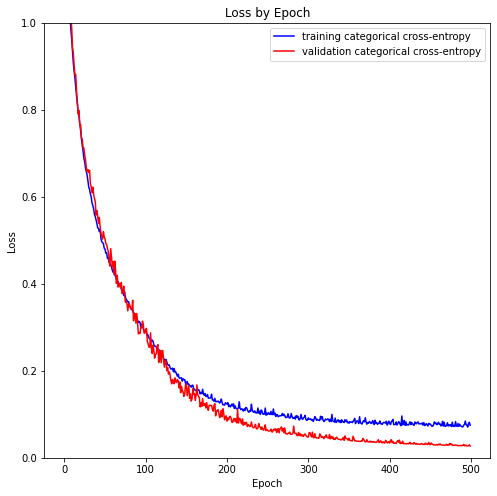

In [23]:
plt.figure(figsize=(8,8))
plt.plot(model.history['loss'], label='training categorical cross-entropy', color='blue')
plt.plot(model.history['val_loss'], label='validation categorical cross-entropy', color='red')
plt.title('Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 1.])
plt.legend(loc='upper right')

The loss is getting smaller and smaller upon more epochs. This also shows that it is harder to train the model then it is to validate the results. Furthermore, by examining this graph, it doesn't look like having more than 500 epochs makes sense, as the graph "bottoms out."

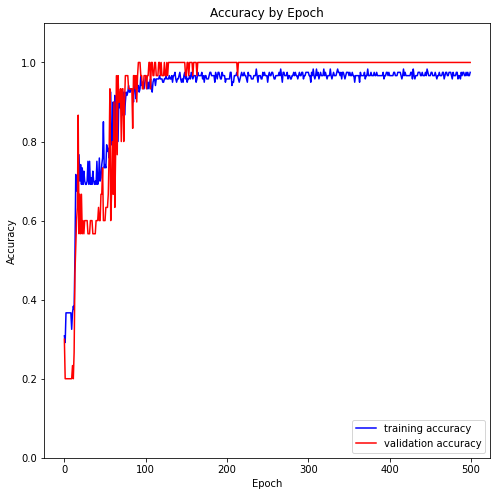

In [24]:
plt.figure(figsize=(8,8))
plt.plot(model.history['accuracy'], label='training accuracy',color='blue')
plt.plot(model.history['val_accuracy'], label = 'validation accuracy',color='red')
plt.title('Accuracy by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.1])
plt.legend(loc='lower right')

Basing off of this graph, after around 150 epochs, the results don't seem to get better, and in fact, they are already quiet good. This model seems to work very well with this data.

### Conclusion
SVM with a Linear Kernal (Nonscaled) results:

- Features AB results: 0.82
- Features AC results: 0.9533333333333334
- Features AD results: 0.96
- Features BC results: 0.96
- Features BD results: 0.96
- Features CD results: 0.9666666666666667

Tensorflow Accuracies:

As epochs approach infinity, it appears that the accuracy approaches 98.33%. Using a neural network of 20 nodes, followed by 12, followed by 3, the model seems to be performing well. There is no need to add more depth or more nodes as our training data is very limited and we would need to have more data samples in order to make a more in depth neural network. Furthermore, the neural network model is slightly more accurate compared to the SVM.